# Lab 2 (2|2)
## Excel with Pandas

In [10]:
import pandas as pd

Import the dataset to a pandas DataFrame (the processed file)

In [11]:
movies = pd.read_csv('movies_processed.csv')
movies.head()

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
0,0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087,2550.965087,Good
1,1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300.0,961.000000,661.000000,Average
2,2,Spectre,2015-10-26,148,4466,6.3,245.0,880.674609,635.674609,Average
3,3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250.0,1084.939099,834.939099,Good
4,4,John Carter,2012-03-07,132,2124,6.1,260.0,284.139100,24.139100,Average


1. Which were the top 5 most successful movies in terms of profit? What is the average rating of these movies?

In [12]:
most_profit = movies.sort_values(by='profit',ascending=False).head(5)
most_profit

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
0,0,Avatar,2009-12-10,162,11800,7.2,237.0,2787.965087,2550.965087,Good
25,25,Titanic,1997-11-18,194,7562,7.5,200.0,1845.034188,1645.034188,Good
28,28,Jurassic World,2015-06-09,124,8662,6.5,150.0,1513.528810,1363.528810,Average
44,44,Furious 7,2015-04-01,137,4176,7.3,190.0,1506.249360,1316.249360,Good
16,16,The Avengers,2012-04-25,143,11776,7.4,220.0,1519.557910,1299.557910,Good


In [13]:
most_profit['vote_average'].mean()

7.18

2. Which were the top 5 biggest flop movies (the worst) in terms of profit? What is the average rating of these movies?

In [15]:
last_profit = movies.sort_values(by='profit',ascending=True).head(5)
last_profit

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
13,13,The Lone Ranger,2013-07-03,149,2311,5.9,255.0,89.289910,-165.710090,Average
135,135,The Wolfman,2010-02-11,102,549,5.5,150.0,0.000000,-150.000000,Average
338,338,The Alamo,2004-04-07,137,106,5.8,145.0,25.819961,-119.180039,Average
141,141,Mars Needs Moms,2011-03-09,88,199,5.5,150.0,38.992758,-111.007242,Average
1652,1652,Dragonball Evolution,2009-04-01,85,462,2.9,100.0,0.000000,-100.000000,Awful


In [16]:
last_profit['vote_average'].mean()

5.119999999999999

3. How many movies in our dataset are Awful, Poor, Average, Good and Excellent?

In [17]:
movies['rating_category'].value_counts()

Average      3284
Good          981
Poor          438
Awful          86
Excellent       5
Name: rating_category, dtype: int64

4. Create a DataFrame called `movies_above_average` which represents movies with a rating higher or equal than the global average rating and have at least 100 votes

In [20]:
movies_above_average = movies[(movies['vote_average'] >= movies['vote_average'].mean()) & (movies['vote_count'] >= 100)]

In [21]:
movies_above_average

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
0,0,Avatar,2009-12-10,162,11800,7.2,237.000,2787.965087,2550.965087,Good
1,1,Pirates of the Caribbean: At World's End,2007-05-19,169,4500,6.9,300.000,961.000000,661.000000,Average
2,2,Spectre,2015-10-26,148,4466,6.3,245.000,880.674609,635.674609,Average
3,3,The Dark Knight Rises,2012-07-16,165,9106,7.6,250.000,1084.939099,834.939099,Good
4,4,John Carter,2012-03-07,132,2124,6.1,260.000,284.139100,24.139100,Average
...,...,...,...,...,...,...,...,...,...,...
4734,4742,Super Size Me,2004-01-17,100,506,6.6,0.065,28.575078,28.510078,Average
4764,4773,Clerks,1994-09-13,92,755,7.4,0.027,3.151130,3.124130,Good
4779,4788,Pink Flamingos,1972-03-12,93,110,6.2,0.012,6.000000,5.988000,Average
4787,4796,Primer,2004-10-08,77,658,6.9,0.007,0.424760,0.417760,Average


# Looking for the trilogy

5. Let's try to find the Matrix trilogy movies. Search the dataset for movies whose title contains "The Matrix". The resulting DataFrame should have 3 rows.

In [22]:
movies[movies['title'].str.contains('Matrix')]

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
123,123,The Matrix Revolutions,2003-11-05,129,3096,6.4,150.0,424.988211,274.988211,Average
125,125,The Matrix Reloaded,2003-05-15,138,3443,6.7,150.0,738.599701,588.599701,Average
634,634,The Matrix,1999-03-30,136,8907,7.9,63.0,463.517383,400.517383,Good


6. Order the trilogy by release date. The first result should be the oldest (the first movie).

In [25]:
matrix_movies = movies[movies['title'].str.contains('Matrix')].sort_values(by='release_date', ascending=True)
matrix_movies

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
634,634,The Matrix,1999-03-30,136,8907,7.9,63.0,463.517383,400.517383,Good
125,125,The Matrix Reloaded,2003-05-15,138,3443,6.7,150.0,738.599701,588.599701,Average
123,123,The Matrix Revolutions,2003-11-05,129,3096,6.4,150.0,424.988211,274.988211,Average


7. Fill in the code to answer the following questions:
    * How much money did the all franchise make? How much did it cost? What was the total profit?
    * Which was the best movie (in terms of Rating) 
    * Using a barplot, plot the Ratings of each movie
    * When did the first movie came out? And the last one? How many years inbetween?

In [26]:
matrix_movies['budget'].sum()

363.0

In [27]:
matrix_movies['revenue'].sum()

1627.105295

In [28]:
matrix_movies['profit'].sum()

1264.1052949999998

In [29]:
matrix_movies[['budget','revenue','profit']].sum()

budget      363.000000
revenue    1627.105295
profit     1264.105295
dtype: float64

In [32]:
matrix_movies[matrix_movies['vote_average'] == matrix_movies['vote_average'].max()]

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category
634,634,The Matrix,1999-03-30,136,8907,7.9,63.0,463.517383,400.517383,Good


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fda067c6210&gt;

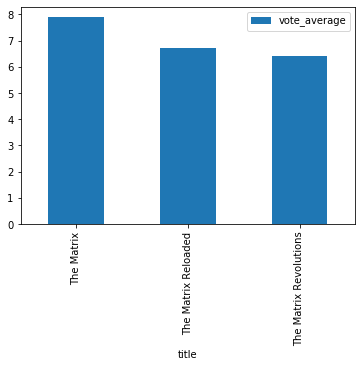

In [34]:
matrix_movies.plot(kind='bar',x='title',y='vote_average')

In [36]:
matrix_movies['release_date'] = pd.to_datetime(matrix_movies['release_date'])

In [37]:
matrix_movies['year'] = matrix_movies['release_date'].dt.year

matrix_movies

,Unnamed: 0,title,release_date,runtime,vote_count,vote_average,budget,revenue,profit,rating_category,year
634,634,The Matrix,1999-03-30,136,8907,7.9,63.0,463.517383,400.517383,Good,1999
125,125,The Matrix Reloaded,2003-05-15,138,3443,6.7,150.0,738.599701,588.599701,Average,2003
123,123,The Matrix Revolutions,2003-11-05,129,3096,6.4,150.0,424.988211,274.988211,Average,2003
